https://scikit-learn.org/stable/auto_examples/cluster/plot_segmentation_toy.html#:~:text=In%20these%20settings%2C%20the%20Spectral%20clustering%20approach%20solves,the%20cut%2C%20and%20the%20volume%20of%20the%20region.

(500, 500, 3)


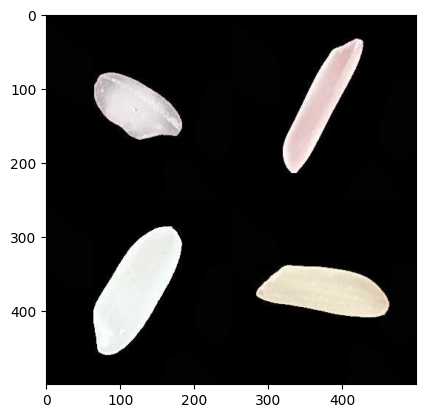

In [5]:
import cv2
import matplotlib.pyplot as plt

path = "G:/Mi unidad/Maestria Data Mining/2023Q2 DMCyT/unsupervised-rice-image-segmentation/Rice_Image_Dataset"
path_01 = path+"/Arborio/Arborio (15000).jpg"
path_02 = path+"/Basmati/basmati (15000).jpg"
path_03 = path+"/Ipsala/Ipsala (15000).jpg"
path_04 = path+"/Jasmine/Jasmine (15000).jpg"
path_05 = path+"/Karacadag/Karacadag (15000).jpg"

imagen1 = cv2.imread(path_01)
imagen2 = cv2.imread(path_02)
imagen3 = cv2.imread(path_03)
imagen4 = cv2.imread(path_04)
imagen5 = cv2.imread(path_05)

# Concatenando imágenes,
concat_h1 = cv2.hconcat([imagen1, imagen2])
concat_h2 = cv2.hconcat([imagen3, imagen4])
img = cv2.vconcat([concat_h1, concat_h2])
plt.imshow(img)
print(img.shape)


(250, 250)


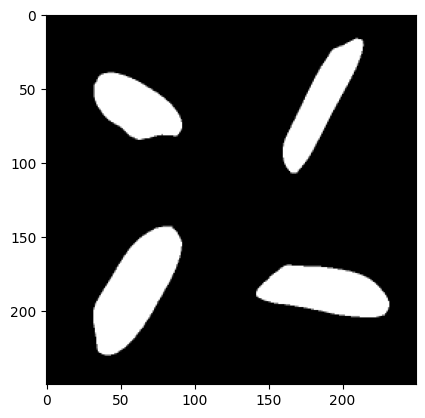

In [84]:
scale_percent = 50 # percent of original size 
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

thresh = 127
binary = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 
                               thresh, 255, cv2.THRESH_BINARY)[1] #THRESH_BINARY o THRESH_BINARY_INV

resized_binary = cv2.resize(binary, dim, interpolation = cv2.INTER_AREA)
   
plt.imshow(resized_binary,'gray',vmin=0,vmax=255)
print(resized_binary.shape)

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

g:\Mi unidad\Maestria Data Mining\2023Q2 DMCyT\unsupervised-rice-image-segmentation\venv_rice\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


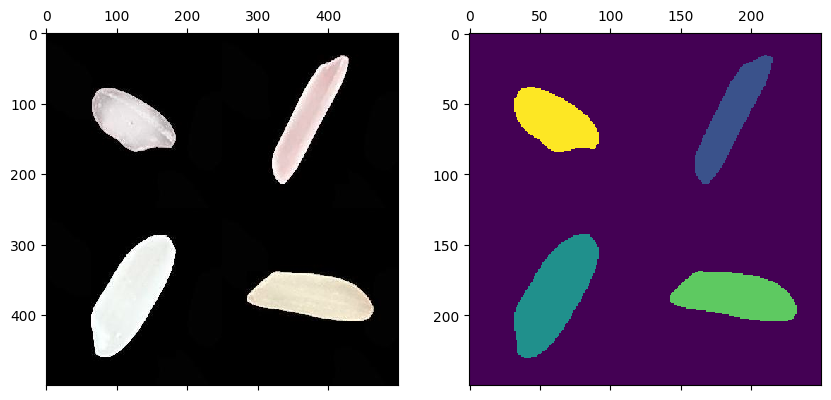

In [86]:
from sklearn.feature_extraction import image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import spectral_clustering

# We use a mask that limits to the foreground: the problem that we are
# interested in here is not separating the objects from the background,
# but separating them one from the other.
mask = resized_binary.astype(bool)

graph = image.img_to_graph(resized_binary, mask=mask)
graph.data = np.exp(-graph.data / graph.data.std())

labels = spectral_clustering(graph, n_clusters=4, eigen_solver="lobpcg")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(resized)
axs[1].matshow(label_im)

plt.show()